In [ ]:
from Bio import SeqIO

In [ ]:
from Bio.Data import CodonTable
import pandas as pd
from Bio.Seq import Seq
import matplotlib as plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
pip install biopython

In [ ]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {} #Initialize an empty dictionary to store species names as key and the sequence as value
    for record in SeqIO.parse(fasta_fn,"fasta"): #This reads the FASTA file (fasta_fn), and returns an iterator that loops through the entries in the file
        description = record.description.split() #Splits the description string into a list of words
        species_name = description[1] + " " + description[2] #This extracts the species name by taking the second and third elements of the split description list
        sequence_data_dict[species_name] = record.seq #Contains the actual DNA sequence in the entry
    return(sequence_data_dict)#This function returns the dictionary

In [58]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #using Biopython's CodonTable to access a specific genetic code table for vertebrate mitochondria.
print(mito_table) #looking at the contents of mito_table

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [59]:
def translate_function(string_nucleotides): #defines the function translate_function
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #This line accesses the Vertebrate Mitochondrial codon table from CodonTable.unambiguous_dna_by_name
    aa_seq_string = '' # Initializes Empty String
    if len(string_nucleotides)%3 == 0: #checks if the length of nucleotide string is divisible by 3
       for i in range(0, len(string_nucleotides), 3):
           codon = string_nucleotides[ i:i + 3]
    if codon in ["TAA", "TAG", "AGA", "AGG"]: #Check if codon is a stop codon
            return aa_seq_string
    aa_seq_string+= mito_table[codon] #Translate codon to amino acid
    return aa_seq_string
    

In [60]:
def translate(string_nucleotides):
    seq_string = Seq(string_nucleotides).translate(table=2, to_stop=True) #This specifies that the translation should use Table 2 and the translation will stop when a stop codon. 
    return str(seq_string)



In [61]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_seq):
    aa_analysis = ProteinAnalysis(aa_seq) #creates a ProteinAnalysis object for the input amino acid sequence aa_seq
    molecular_weight = aa_analysis.molecular_weight() #calculates the molecular weight of the protein sequence in Daltons (Da)
    return molecular_weight #returns the computed molecular weight of the protein sequence


In [62]:
def gc_content(DNA_string): #defines the function gc_content that takes a single parameter, DNA_string, which is a string of DNA nucleotides
    G_count = DNA_string.count("G") #counts the number of guanine (G) nucleotides in the DNA sequence.
    C_count = DNA_string.count("C") #counts the number of cytosine (C) nucleotides in the DNA sequence.
    DNAstring_length = len(DNA_string) #returns the total length of the DNA string
    GC_content = (C_count + G_count) / DNAstring_length #Calculating GC Content 
    return GC_content #returns the calculated GC content value


In [63]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")


In [64]:
penguins_df = pd.read_csv("penguins_mass.csv")
species_list = list(penguins_df["species"])

In [65]:
cytb_seqs

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

In [66]:
penguins_df #checking the csv file information


,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


In [67]:
species_list

['Aptenodytes forsteri',
 'Aptenodytes patagonicus',
 'Eudyptes chrysocome',
 'Eudyptes chrysolophus',
 'Eudyptes sclateri',
 'Eudyptula minor',
 'Pygoscelis adeliae',
 'Pygoscelis antarctica',
 'Pygoscelis papua',
 'Spheniscus demersus',
 'Spheniscus humboldti',
 'Spheniscus magellanicus']

In [68]:
penguins_df["Molecular Weight"] = penguins_df.shape[0]*["NaN"]


In [69]:
penguins_df

,species,mass,Molecular Weight
0,Aptenodytes forsteri,28.00,NaN
1,Aptenodytes patagonicus,13.40,NaN
2,Eudyptes chrysocome,2.80,NaN
3,Eudyptes chrysolophus,4.50,NaN
4,Eudyptes sclateri,4.25,NaN
5,Eudyptula minor,1.60,NaN
6,Pygoscelis adeliae,4.60,NaN
7,Pygoscelis antarctica,4.10,NaN
8,Pygoscelis papua,6.10,NaN
9,Spheniscus demersus,3.20,NaN


In [70]:
penguins_df["GC content"] = penguins_df.shape[0] * ["NaN"]
penguins_df


,species,mass,Molecular Weight,GC content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


In [71]:
# Start empty lists to collect values
Molecular_w_list = []
GC_content_list = []

# Loop through your cytochrome b sequences
for key, value in cytb_seqs.items():
    aa_seq = translate(value)  # Use your custom translate() function
    mol_wt = compute_molecular_weight(str(aa_seq))  # Compute molecular weight
    gc_perc = gc_content(value) * 100  # Convert GC fraction to percentage

    Molecular_w_list.append(mol_wt)
    GC_content_list.append(gc_perc)

# Assign the computed values to the DataFrame columns
penguins_df["Molecular Weight"] = Molecular_w_list
penguins_df["GC content"] = GC_content_list

# Print the updated DataFrame
print(penguins_df)


                    species   mass  Molecular Weight  GC content
0      Aptenodytes forsteri  28.00        42459.6021   48.381452
1   Aptenodytes patagonicus  13.40        42563.7067   49.693788
2       Eudyptes chrysocome   2.80        42475.5753   51.181102
3     Eudyptes chrysolophus   4.50        42445.5493   50.918635
4         Eudyptes sclateri   4.25        42475.5753   50.831146
5           Eudyptula minor   1.60        42491.6408   49.256343
6        Pygoscelis adeliae   4.60        42458.6140   49.081365
7     Pygoscelis antarctica   4.10        42404.5423   47.769029
8          Pygoscelis papua   6.10        42595.8759   47.156605
9       Spheniscus demersus   3.20        42431.5490   48.293963
10     Spheniscus humboldti   4.75        42399.5520   49.256343
11  Spheniscus magellanicus   3.40        42459.6021   48.206474


In [72]:
%matplotlib inline


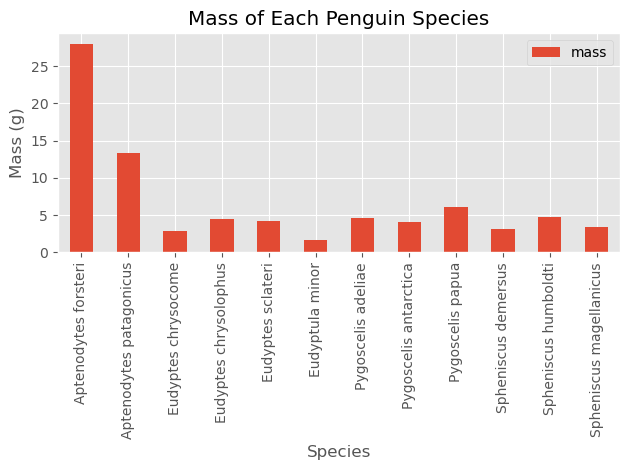

In [77]:
penguins_df.plot(kind='bar', x='species', y='mass')
plt.title('Mass of Each Penguin Species')
plt.ylabel('Mass (g)')
plt.xlabel('Species')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
### a. Eudyptula minor is the smallest penguin species
### b. Coastlines of southern Australia and New Zealand
### Source: https://www.wildlife.vic.gov.au/__data/assets/pdf_file/0023/91391/Little-Penguin.pdf

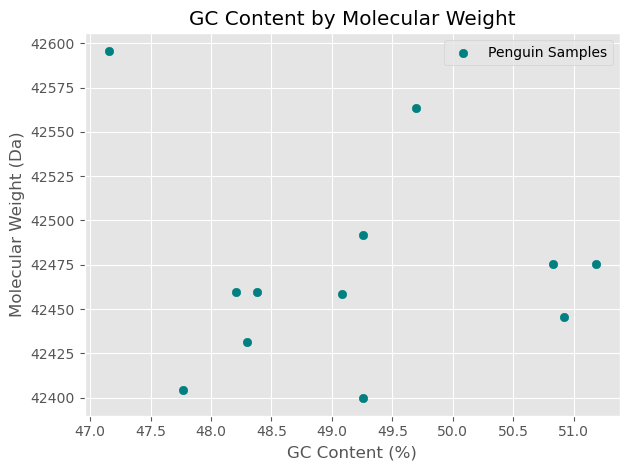

In [74]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plotting scatter with a label so the legend can display it
my_scatter_plot = ax.scatter(
    penguins_df["GC content"],
    penguins_df["Molecular Weight"],
    label="Penguin Samples",
    c='teal'  # Optional: adds color for better visibility
)

# Adding titles and labels
plt.title("GC Content by Molecular Weight")
plt.xlabel("GC Content (%)")
plt.ylabel("Molecular Weight (Da)")
plt.legend()  # Will now show "Penguin Samples"
plt.tight_layout()
plt.show()


In [75]:
penguins_df.to_csv('penguins_mass_cytb.csv', index=False)
